In [4]:
import math
import torch

In [5]:
def get_masks(imsize=128):
    m1 = torch.ones((imsize, math.floor(imsize / 2)))
    m2 = torch.zeros((imsize, math.ceil(imsize / 2)))
    mask1 = torch.cat((m1, m2), dim=1)

    m2o = torch.zeros((imsize, math.floor(imsize / 2)))
    m2a = torch.ones((math.floor(imsize / 2),math.ceil(imsize/2)))
    m2b = torch.zeros(((math.ceil(imsize / 2), math.ceil(imsize / 2))))
    mask2 = torch.cat((m2o, torch.cat((m2a,m2b))), dim=1)

    masks=[mask1, mask2]
    masks = torch.stack(masks)
    return masks

In [6]:
masks = get_masks()

In [7]:
style_paths = ['./images/picasso.jpg', './images/klee.jpg']
content_path  = './images/dancing.jpg'

In [8]:
from spatial_transfer import StyleTransfer

In [9]:
st = StyleTransfer()

Using default pre-trained network
Using default style and content layers


In [10]:
output = st.run_style_transfer(content_path, style_paths, spatial_mask=masks, num_steps=50)

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 7.633467 Content Loss: 15.322145



In [12]:
from utils import imshow

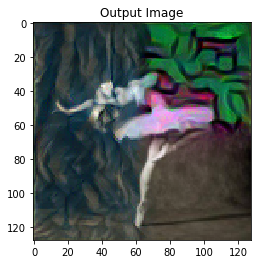

In [13]:
imshow(output, title='Output Image')